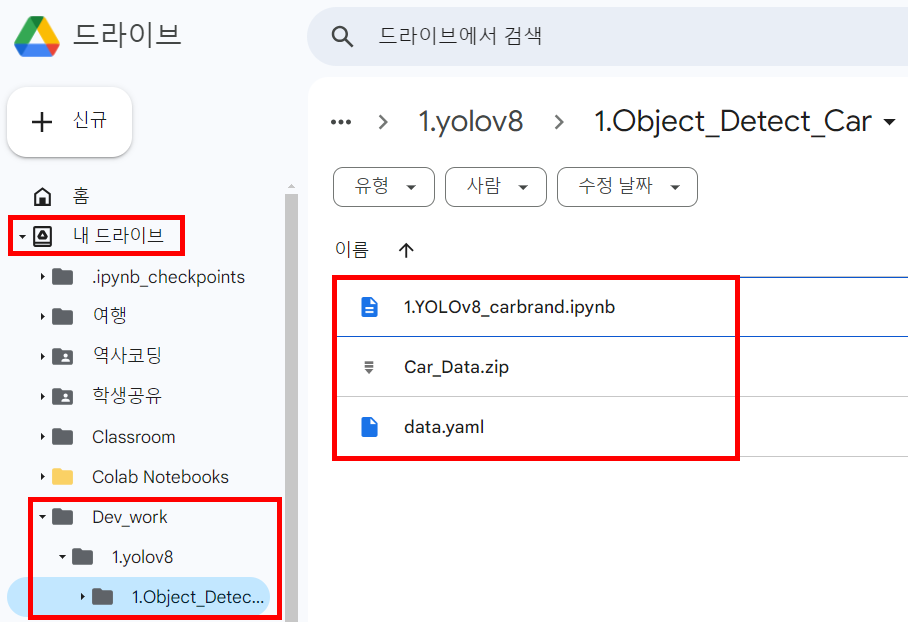

## YOLOv8 학습 프로세스 (커스텀 데이터)

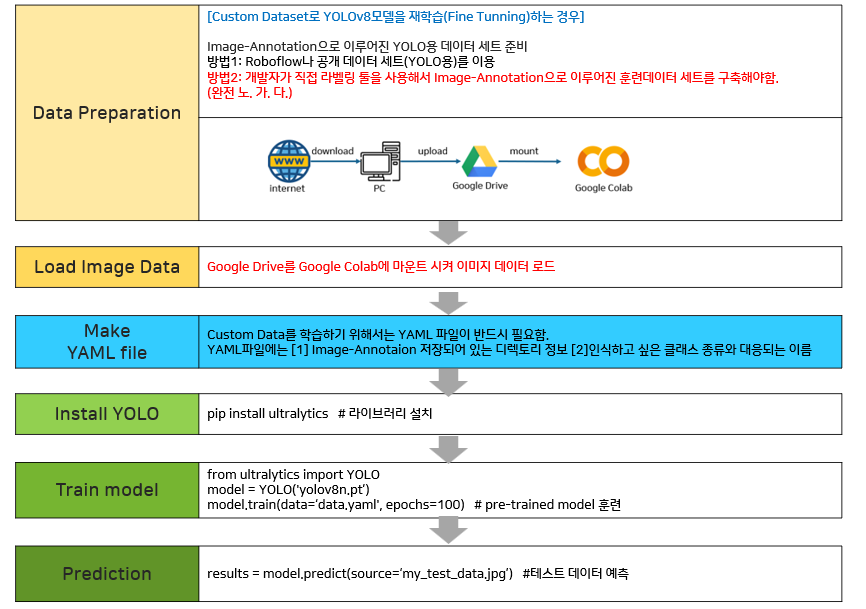

## 데이터 수집

1. 클래스 별로 이미지를 수집 계획을 세운다.
2. 크롤링,AI hub, kaggle 등의 이미지를 수집한다.
3. 이미지 별로 Labeling 작업을 진행한다.

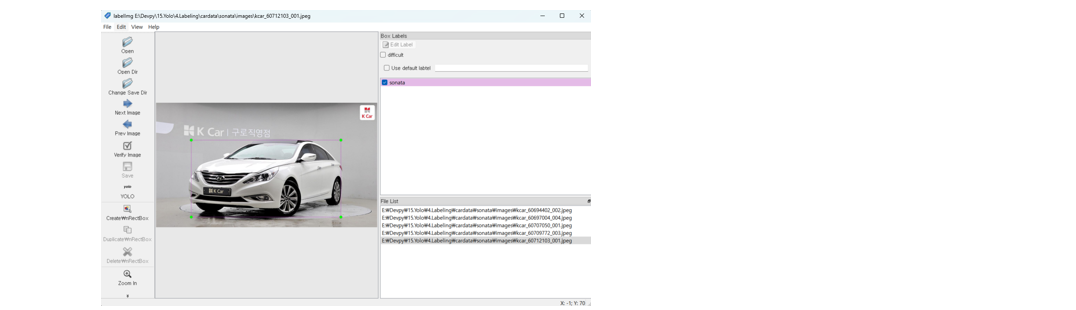

## 데이터 로드
드라이브에 이미지 파일 넣어둠


In [54]:
pwd

'c:\\windows_v1.8.1\\img'

In [1]:
ROOT_DIR = 'C:\yolotest'    # Colab root dir

In [2]:
import os

YOLOv8_ROOT_DIR = os.path.join(ROOT_DIR, 'yolov8')

#==============================================================================
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'image_data')  # Custom Data
#==============================================================================

print(YOLOv8_ROOT_DIR, DATA_ROOT_DIR, type(YOLOv8_ROOT_DIR), type(DATA_ROOT_DIR))

C:\yolotest\yolov8 C:\yolotest\image_data <class 'str'> <class 'str'>


remove 금지 !!!

In [9]:
# import shutil

# if os.path.exists(DATA_ROOT_DIR):

#     shutil.rmtree(DATA_ROOT_DIR)
#     print(DATA_ROOT_DIR + ' is removed !!')

In [ ]:
# # Colab의 /content/gdrive/에 Google Drive 마운트

# from google.colab import drive

# drive.mount('/content/gdrive/')

In [5]:
# GOOGLE_ROOT_DIR = r'C:\windows_v1.8.1\img' 

In [ ]:
# import shutil

# # 구글드라이브에 있는 데이터 세트를 코랩 가상드라이브에 복사
# shutil.copy(os.path.join(GOOGLE_ROOT_DIR, 'my_data.zip'), ROOT_DIR)

In [8]:
# import zipfile

# #가상 드라이브에 있는 zip파일을 풀기
# with zipfile.ZipFile(os.path.join(ROOT_DIR, 'my_data.Zip'), 'r') as target_file:

#     target_file.extractall(DATA_ROOT_DIR)

In [3]:
# 데이터 확인

import os

print('train image # => ', len(os.listdir(os.path.join(DATA_ROOT_DIR, 'train/images/'))))
print('train label # => ', len(os.listdir(os.path.join(DATA_ROOT_DIR, 'train/labels/'))))
print('valid image # => ', len(os.listdir(os.path.join(DATA_ROOT_DIR, 'valid/images/'))))
print('valid label # => ', len(os.listdir(os.path.join(DATA_ROOT_DIR, 'valid/labels/'))))
print('test image # => ', len(os.listdir(os.path.join(DATA_ROOT_DIR, 'test/images'))))
print('test label # => ', len(os.listdir(os.path.join(DATA_ROOT_DIR, 'test/labels/'))))

train image # =>  61
train label # =>  61
valid image # =>  20
valid label # =>  20
test image # =>  20
test label # =>  20


---

In [ ]:
# # Ultralytics YOLO 🚀, AGPL-3.0 license
# # COCO8 dataset (first 8 images from COCO train2017) by Ultralytics
# # Documentation: https://docs.ultralytics.com/datasets/detect/coco8/
# # Example usage: yolo train data=coco8.yaml
# # parent
# # ├── ultralytics
# # └── datasets
# #     └── coco8  ← downloads here (1 MB)

# # Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
# path: /content/gdrive/MyDrive/Kairos/YOLOv8/3.Object_Detect_Car/Car_Data # dataset root dir
# train: /content/gdrive/MyDrive/Kairos/YOLOv8/3.Object_Detect_Car/Car_Data/train # train images (relative to 'path') 4 images
# val: /content/gdrive/MyDrive/Kairos/YOLOv8/3.Object_Detect_Car/Car_Data/valid # val images (relative to 'path') 4 images
# test: # test images (optional)

# # Classes
# names:
#   0: genesis
#   1: rexton


# # Download script/URL (optional)
# #download: https://ultralytics.com/assets/coco8.zip

# yaml 파일 설정
* 데이터셋 위치 알려주는 config file
* roboflow 에서 제공되는 data.yaml 파일 확인

In [10]:
ROOT_DIR

'C:\\windows_v1.8.1\\img'

In [ ]:
# import shutil

# # 구글드라이브에 있는 데이터 세트를 코랩 가상드라이브에 복사
# shutil.copy(os.path.join(GOOGLE_ROOT_DIR, 'data.yaml'), ROOT_DIR)

In [33]:
%cat {os.path.join(GOOGLE_ROOT_DIR, 'data.yaml')}

```
* train,val,test 경로가 나의 작업 환경과 맞지 않아 수정이 필요

* nc: name of class 객체 인식할 클래수 개수

* name: 클래스 이름


```

### custom data에 대한 yaml 파일 만들기

In [5]:
#pip install PyYAML # 파이썬에서 YAML 파일을 사용하기 위한 라이브러리

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# # yaml 파일을 학습이 가능하도록 경로 설정.
# # key-value 데이터인 dict 데이터 타입으로 data['train'], data['val'], data['nc'], data['names'] 에 넣어주는데,
# # 가장 중요한 부분은 데이터 경로 설정임.

# import yaml

# # Yolo8v학습과 검증에 사용되는 train,valid data가 저장되어 있는 디렉토리 경로
# data = { 'train' : 'C:\windows_v1.8.1\img\my_data\train\images',
#          'val' : 'C:\windows_v1.8.1\img\my_data\valid\images',
#          'test' : 'C:\windows_v1.8.1\img\my_data\test\images',
#          'names' : ['normal','error'],
#          'nc' : 5 } #detection 하고 싶은 클래스 개수

# with open('/content/data.yaml', 'w') as f:  #저장
#   yaml.dump(data, f)


# with open('/content/data.yaml', 'r') as f:  #읽기
#   cardata_yaml = yaml.safe_load(f)

# cardata_yaml


# data.yaml 파일 폴더 내에 따로 만들어줬기 때문에 해당 코드는 필요 없음

In [13]:
# %cat /content/data.yaml

UsageError: Line magic function `%cat` not found.


---

# YOLOv8 설치

*  https://github.com/ultralytics/ultralytics

In [5]:
!pip install ultralytics

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.24.4 which is incompatible.
tensorflow-intel 2.13.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.13.0 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.10.0 which is incompatible.
tensorflow-intel 2.13.0 requires tensorflow-estimator<2.14,>=2.13.0, but you have tensorflow-estimator 2.10.0 which is incompatible.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.11.0 which is incompatible.


In [4]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.1.47  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Setup complete  (12 CPUs, 15.6 GB RAM, 388.2/475.6 GB disk)


# Train (Python version)

In [5]:
# Load YOLOv8n

from ultralytics import YOLO

model = YOLO(os.path.join(YOLOv8_ROOT_DIR, 'yolov8n.pt'))  # 사전 학습된 yolov8 나노 버전 모델 다운

# 다른 버전도 다운 받아서 시도.

100%|██████████| 6.23M/6.23M [00:00<00:00, 22.8MB/s]


In [5]:
print(type(model.names), len(model.names))

print(model.names) # MS COCO에서 정의된 클래스 개수와 종류 확인할 수 있음.(총 80개)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [ ]:
# 텐서보드 시작(option)

# %load_ext tensorboard

# %tensorboard --logdir {os.path.join(YOLOv8_ROOT_DIR, 'runs/train/exp/')}

In [6]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

results = model.train(data='data.yaml', epochs=100, imgsz=640)

100%|██████████| 6.23M/6.23M [00:00<00:00, 18.4MB/s]


Ultralytics YOLOv8.1.47  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

train: Scanning C:\yolotest\image_Data\train\labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
val: Scanning C:\yolotest\image_Data\valid\labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.27G     0.7932      3.093      1.166         30        640: 100%|██████████| 4/4 [00:04<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         20         20    0.00348          1      0.436      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.28G     0.7834      3.062      1.141         31        640: 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         20         20    0.00333          1      0.623       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.28G     0.5433      2.459      1.023         33        640: 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         20         20    0.00332          1      0.754      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.28G     0.5266      1.898       1.01         24        640: 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         20         20       0.65      0.818      0.814      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.28G      0.502       1.46     0.9481         25        640: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         20         20          1      0.587      0.968      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.28G     0.5993       1.29      1.047         32        640: 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         20         20      0.989      0.626      0.973      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.28G      0.573      1.271      1.004         31        640: 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         20         20      0.993      0.609      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.28G     0.6474      1.378      1.033         36        640: 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         20         20      0.986      0.714      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.29G     0.6095      1.265      1.054         27        640: 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         20         20      0.973          1      0.995      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.28G     0.6711      1.417      1.059         24        640: 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         20         20      0.912      0.925      0.995      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.28G     0.7136      1.432      1.103         20        640: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         20         20      0.882      0.899      0.933      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.28G     0.7962       1.43      1.133         35        640: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         20         20      0.972      0.987      0.995      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.28G     0.7096      1.406      1.096         26        640: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         20         20      0.978      0.993      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.29G     0.6954       1.23      1.048         27        640: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         20         20      0.961      0.944      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.29G     0.5846      1.232      1.013         29        640: 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         20         20       0.64      0.971      0.995      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.28G     0.6783       1.14      1.063         29        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         20         20      0.789       0.86      0.995      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.25G      0.671      1.153      1.029         22        640: 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         20         20      0.866          1      0.995      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.25G     0.7105      1.135      1.054         27        640: 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         20         20      0.979      0.997      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.24G     0.7123      1.049      1.075         27        640: 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         20         20      0.918      0.953       0.98      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.25G     0.7508      1.201      1.087         32        640: 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         20         20      0.925      0.985      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.25G     0.7195      1.156      1.047         26        640: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all         20         20      0.949      0.873      0.983      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.25G     0.6626      1.119       1.05         20        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         20         20      0.951      0.969      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.25G     0.5922      1.042      1.012         25        640: 100%|██████████| 4/4 [00:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         20         20      0.983      0.997      0.995      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.25G      0.675      1.068      1.025         29        640: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]

                   all         20         20      0.993          1      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.25G     0.7075      1.086      1.053         30        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         20         20      0.983      0.996      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.25G     0.5357     0.9642     0.9546         29        640: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]

                   all         20         20      0.985      0.937       0.99      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.25G     0.6957      1.049      1.038         40        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         20         20      0.985          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.25G     0.6211     0.9801      1.018         31        640: 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all         20         20      0.963          1      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.25G     0.6816     0.9542      1.027         31        640: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]

                   all         20         20      0.966      0.999      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.25G     0.6388     0.9352      1.022         27        640: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


                   all         20         20      0.977          1      0.995      0.916

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.25G      0.664     0.9585       1.05         29        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         20         20      0.989          1      0.995      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.25G     0.6165     0.8675     0.9827         35        640: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         20         20      0.994          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.25G     0.6138     0.9038      1.011         30        640: 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         20         20      0.985          1      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.25G       0.61     0.8756     0.9987         26        640: 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]

                   all         20         20      0.973          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.25G     0.6133     0.9094      1.031         25        640: 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         20         20      0.982          1      0.995      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.25G     0.5693     0.8493      1.007         27        640: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         20         20      0.988          1      0.995      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.25G     0.6796     0.9226      1.022         30        640: 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         20         20      0.987          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.25G     0.6112     0.8802     0.9907         33        640: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all         20         20      0.984          1      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.25G     0.6089     0.9177      1.026         23        640: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         20         20       0.99          1      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.25G     0.6288     0.8248      1.015         27        640: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         20         20      0.992          1      0.995      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.25G     0.5763     0.8594      1.002         24        640: 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         20         20      0.983          1      0.995      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.25G     0.6009     0.8521      1.011         24        640: 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         20         20       0.99          1      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.25G     0.5938     0.8569     0.9914         23        640: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         20         20      0.994          1      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.25G     0.5913     0.8265       1.02         25        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]

                   all         20         20      0.995          1      0.995      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.25G     0.5888     0.8114     0.9919         37        640: 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]

                   all         20         20      0.994          1      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.25G     0.5603     0.7738       0.98         30        640: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         20         20      0.995          1      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.25G     0.5441     0.7358     0.9664         26        640: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.29it/s]

                   all         20         20      0.995          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.25G     0.4742     0.7223     0.9473         27        640: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         20         20      0.942          1      0.995      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.25G     0.5459      0.705     0.9849         33        640: 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

                   all         20         20      0.895          1      0.978      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.25G     0.4362     0.6464     0.9232         27        640: 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

                   all         20         20      0.861      0.944      0.919      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.25G     0.5109     0.6652     0.9514         25        640: 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.59it/s]

                   all         20         20      0.767       0.88      0.873      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.25G     0.4775     0.6806     0.9481         31        640: 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         20         20      0.658      0.944      0.852      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.25G      0.495     0.7181     0.9613         32        640: 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         20         20      0.654      0.833      0.782      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.25G     0.4957     0.6815     0.9653         24        640: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         20         20      0.966      0.924      0.985      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.25G      0.537     0.7503     0.9808         32        640: 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         20         20      0.965       0.99      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.25G     0.4431     0.6585     0.9138         31        640: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         20         20      0.981          1      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.25G     0.4675     0.6524     0.9212         22        640: 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all         20         20      0.987          1      0.995      0.966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.25G     0.4617     0.6519     0.9357         22        640: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         20         20      0.992          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.25G      0.492     0.6554     0.9514         27        640: 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         20         20      0.994          1      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.25G     0.4752     0.6212     0.9544         32        640: 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all         20         20      0.995          1      0.995      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.25G     0.4742     0.6092     0.9458         26        640: 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]

                   all         20         20      0.995          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.25G     0.4626     0.5951     0.9526         24        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         20         20      0.994          1      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.25G     0.4603     0.5948     0.9377         24        640: 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         20         20      0.995          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.25G     0.4854     0.6077     0.9436         25        640: 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         20         20      0.994          1      0.995      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.25G     0.4002      0.578     0.8919         29        640: 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         20         20      0.993          1      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.25G     0.4437     0.5775     0.9139         32        640: 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         20         20      0.994          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.25G     0.4719     0.5853     0.9396         29        640: 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         20         20      0.994          1      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.25G     0.4355     0.5785     0.9373         21        640: 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

                   all         20         20      0.995          1      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.25G     0.4786     0.6031     0.9671         34        640: 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all         20         20      0.995          1      0.995      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.25G     0.4091      0.542     0.9197         34        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         20         20      0.995          1      0.995       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.25G      0.423     0.5579     0.9467         33        640: 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         20         20      0.995          1      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.25G     0.4946     0.6262     0.9985         33        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         20         20      0.994          1      0.995      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.25G       0.43     0.5331     0.9089         27        640: 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         20         20      0.994          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.25G     0.4334     0.5658     0.9344         29        640: 100%|██████████| 4/4 [00:01<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         20         20      0.994          1      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.25G     0.4278     0.5672     0.9233         18        640: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         20         20      0.995          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.25G     0.4158     0.5332     0.8963         23        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

                   all         20         20      0.995          1      0.995      0.989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.25G     0.3848     0.5278     0.8977         31        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all         20         20      0.995          1      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.25G     0.4643     0.5497     0.9583         24        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         20         20      0.995          1      0.995      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.25G     0.4418     0.5737     0.9525         21        640: 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         20         20      0.995          1      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.25G     0.3843     0.5144     0.9165         33        640: 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         20         20      0.995          1      0.995      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.25G     0.4352     0.5311     0.9166         27        640: 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         20         20      0.995          1      0.995      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.25G     0.4216      0.511     0.9322         25        640: 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         20         20      0.995          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.25G     0.4569     0.5555     0.9216         27        640: 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         20         20      0.995          1      0.995      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.25G     0.4276     0.5561     0.9224         23        640: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all         20         20      0.995          1      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.25G     0.4081     0.5964     0.9343         27        640: 100%|██████████| 4/4 [00:01<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         20         20      0.995          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.25G     0.3725     0.4887     0.9083         31        640: 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all         20         20      0.994          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.25G     0.4241     0.5177     0.9153         36        640: 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         20         20      0.994          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.25G     0.3961     0.5275     0.9252         26        640: 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         20         20      0.995          1      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.25G     0.4102     0.5009     0.9047         24        640: 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all         20         20      0.995          1      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.25G     0.3568     0.4962     0.8979         26        640: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

                   all         20         20      0.995          1      0.995      0.976


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.25G     0.2258     0.5239     0.7816         13        640: 100%|██████████| 4/4 [00:15<00:00,  3.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all         20         20      0.995          1      0.995      0.981



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.25G     0.2268     0.5119     0.7793         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         20         20      0.995          1      0.995      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.25G      0.212      0.517     0.7963         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all         20         20      0.994          1      0.995      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.25G     0.2189     0.5125     0.8162         13        640: 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         20         20      0.994          1      0.995      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.25G     0.2122     0.5036     0.7821         13        640: 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         20         20      0.994          1      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.25G     0.2372     0.5184     0.8146         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         20         20      0.994          1      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.25G     0.2076     0.5075     0.8161         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         20         20      0.994          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.25G     0.2064      0.518     0.7962         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         20         20      0.994          1      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.25G     0.1894     0.5069     0.7912         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         20         20      0.994          1      0.995       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.25G      0.191     0.5029     0.7791         13        640: 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all         20         20      0.994          1      0.995      0.995



100 epochs completed in 0.066 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.2MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics YOLOv8.1.47  Python-3.10.14 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]


                   all         20         20      0.994          1      0.995      0.995
                normal         20          9      0.995          1      0.995      0.995
                 error         20         11      0.993          1      0.995      0.995
Speed: 0.4ms preprocess, 3.9ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to runs\detect\train3


In [27]:
########################## 주의 ##################
## 아래 에러 발생시 코드 실행할 것
## NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968
##############################################

import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [40]:
%pwd

'c:\\windows_v1.8.1\\img'

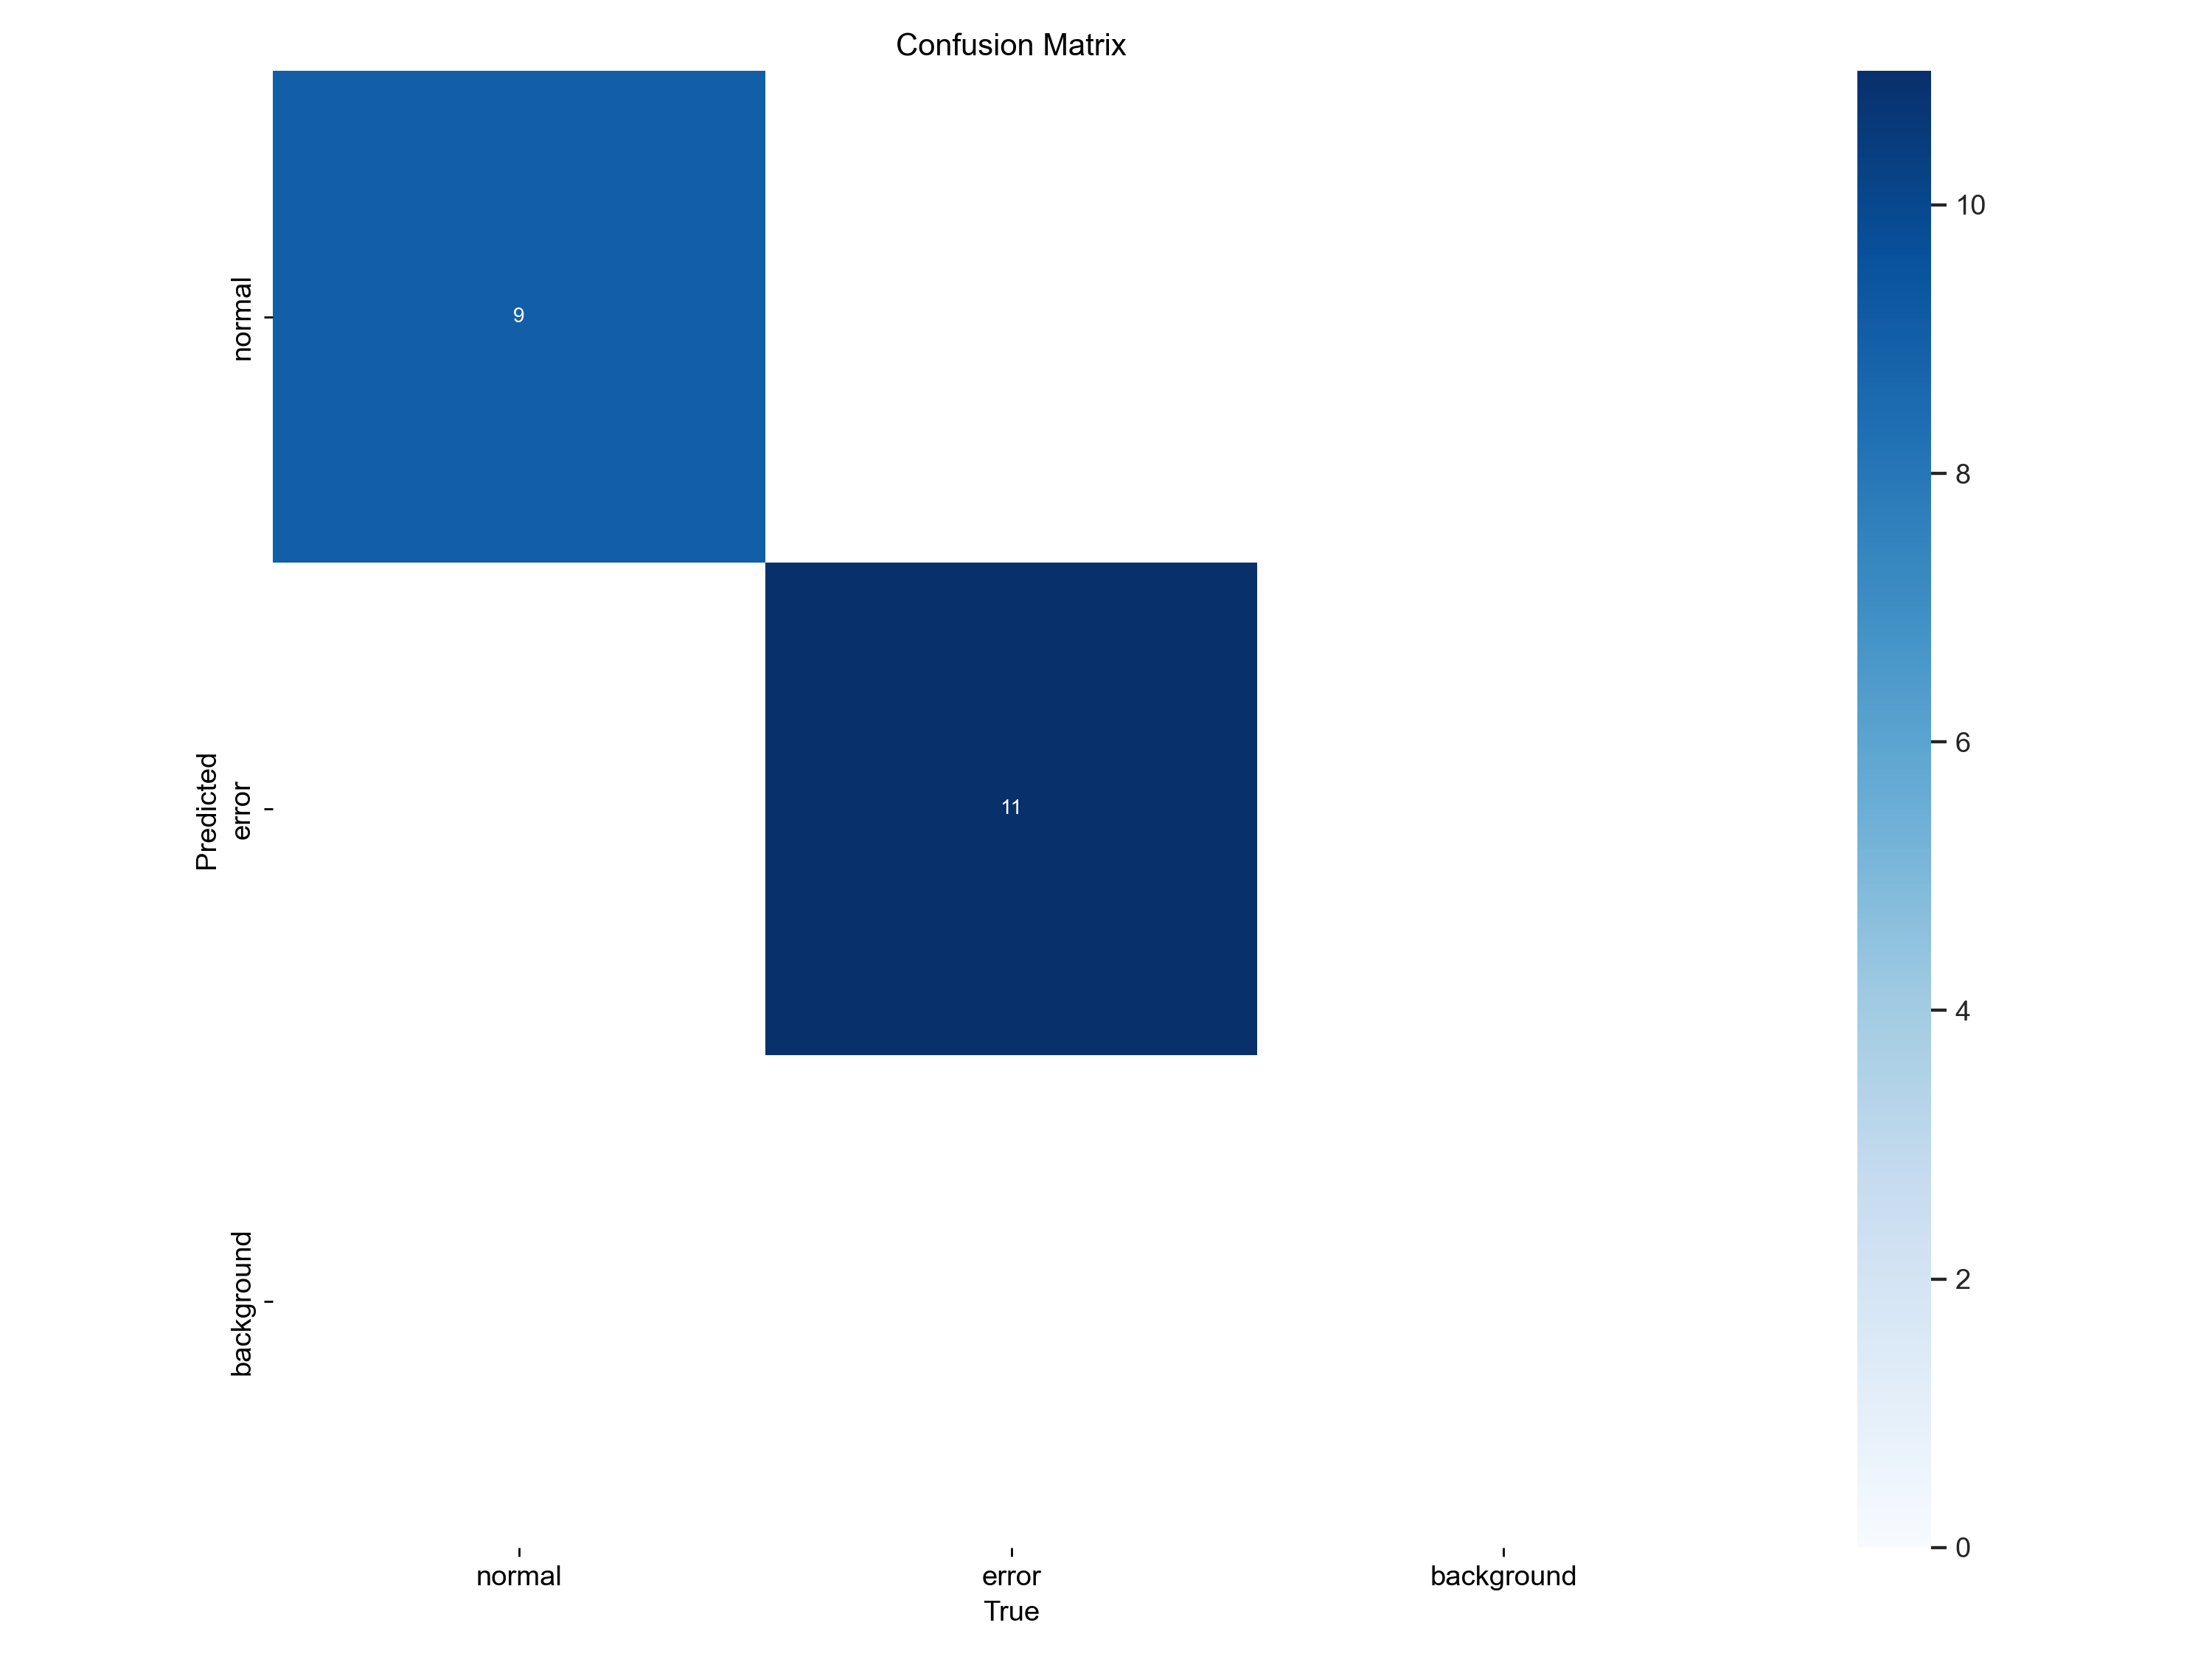

In [8]:
from IPython.display import display, Image

#Image(filename=f'{ROOT_DIR}/runs/detect/train2/weights/confusion_matrix.png', width=600)
Image(filename='C:/yolotest/runs/detect/train3/confusion_matrix.png', width=600)

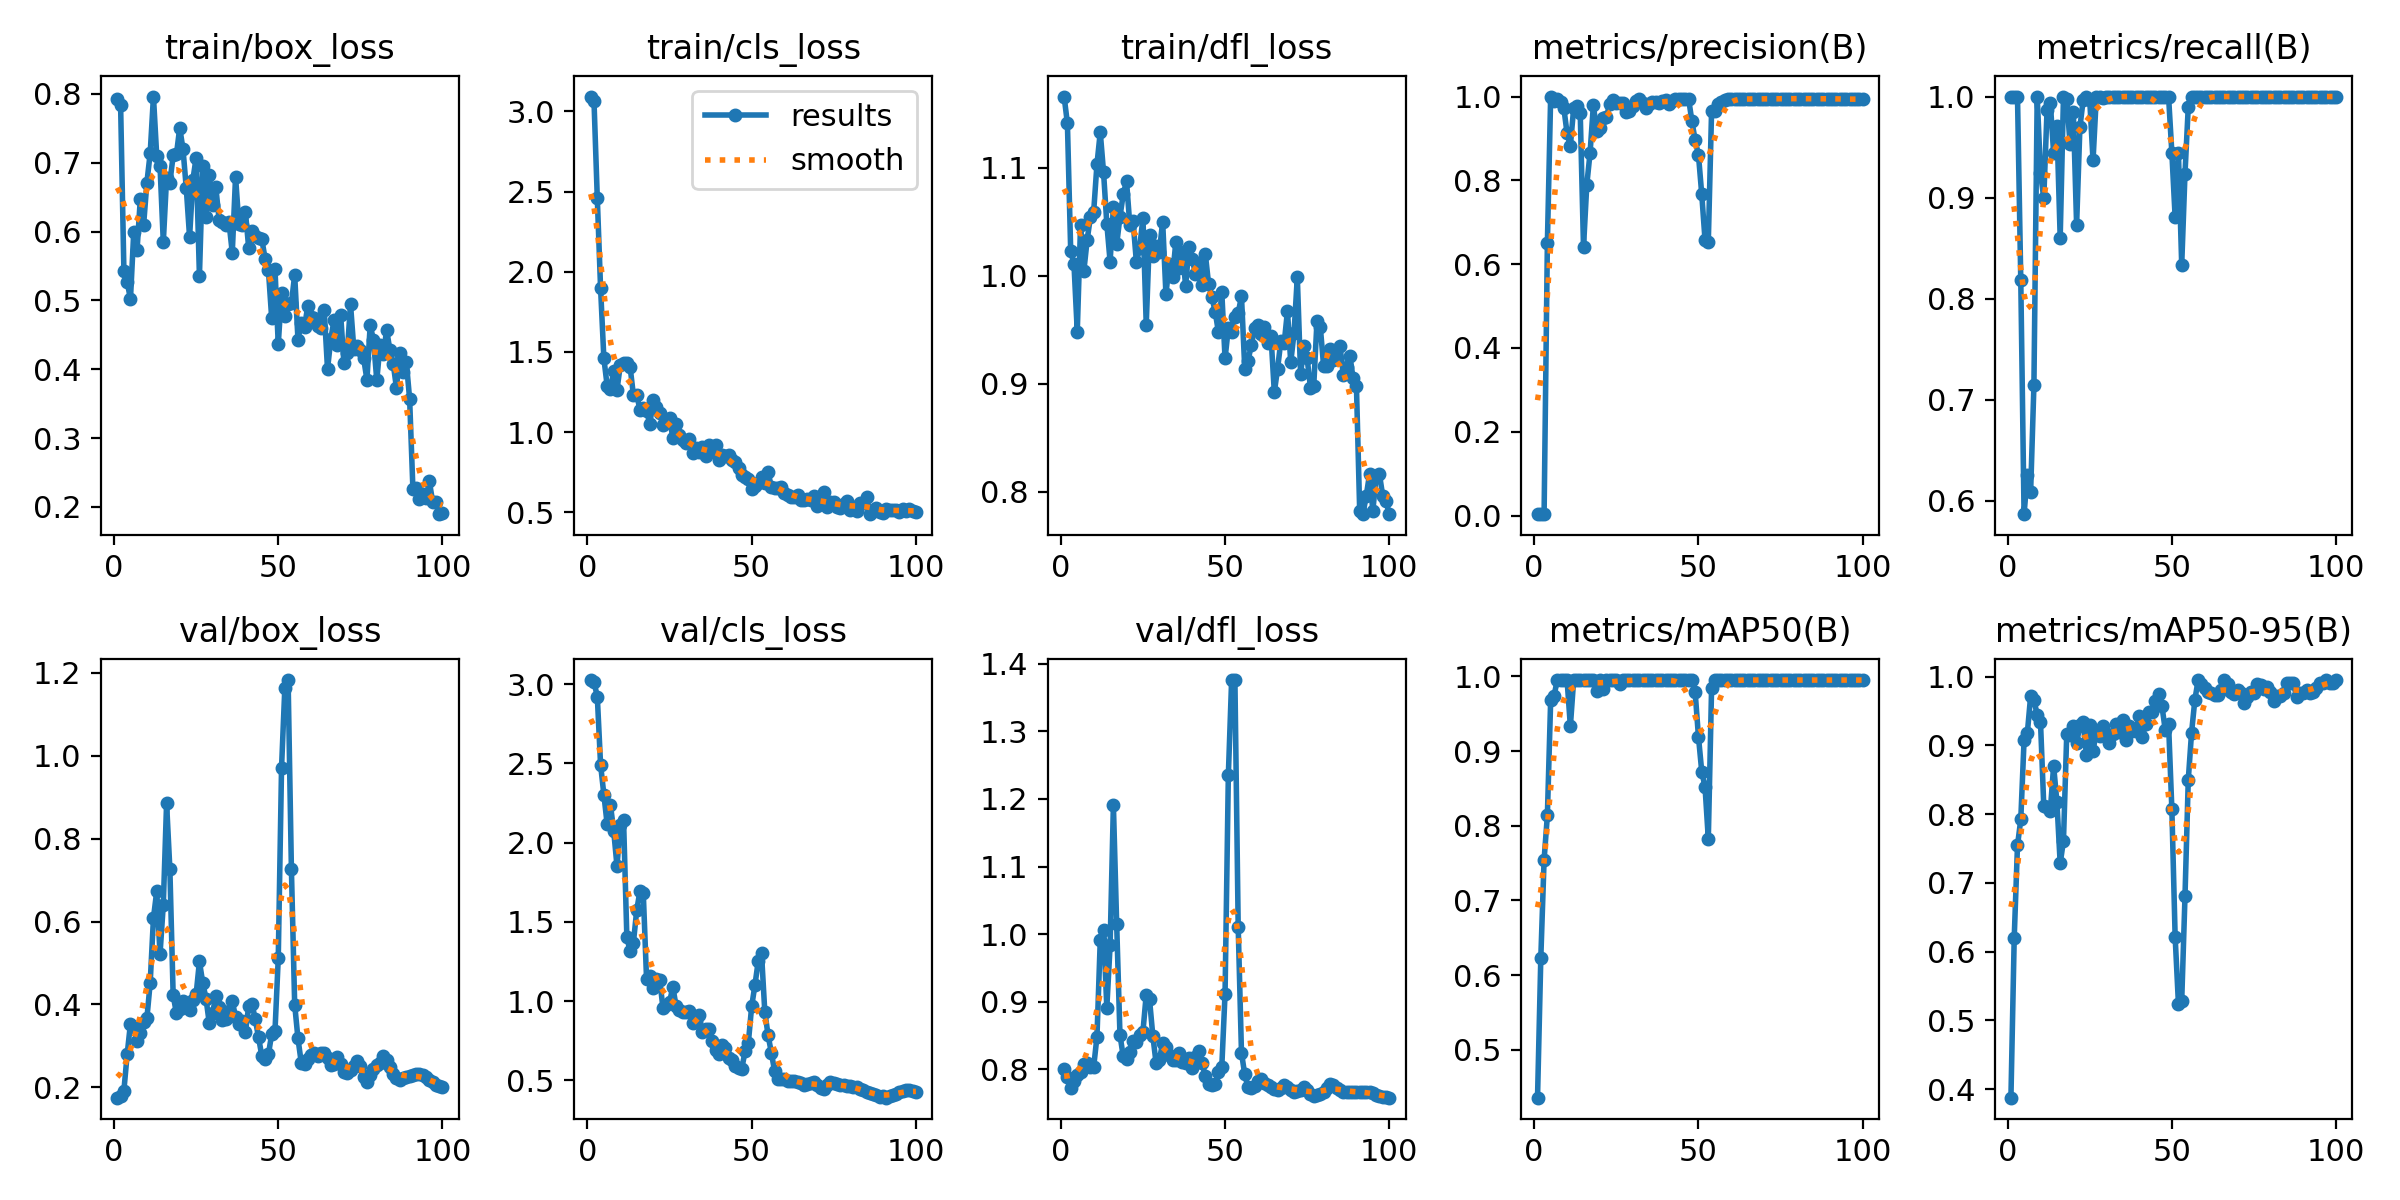

In [9]:
from IPython.display import Image
# Image(filename=f'/content/runs/detect/train2/results.png', width=600)
Image(filename='C:/yolotest/runs/detect/train3/results.png', width=600)

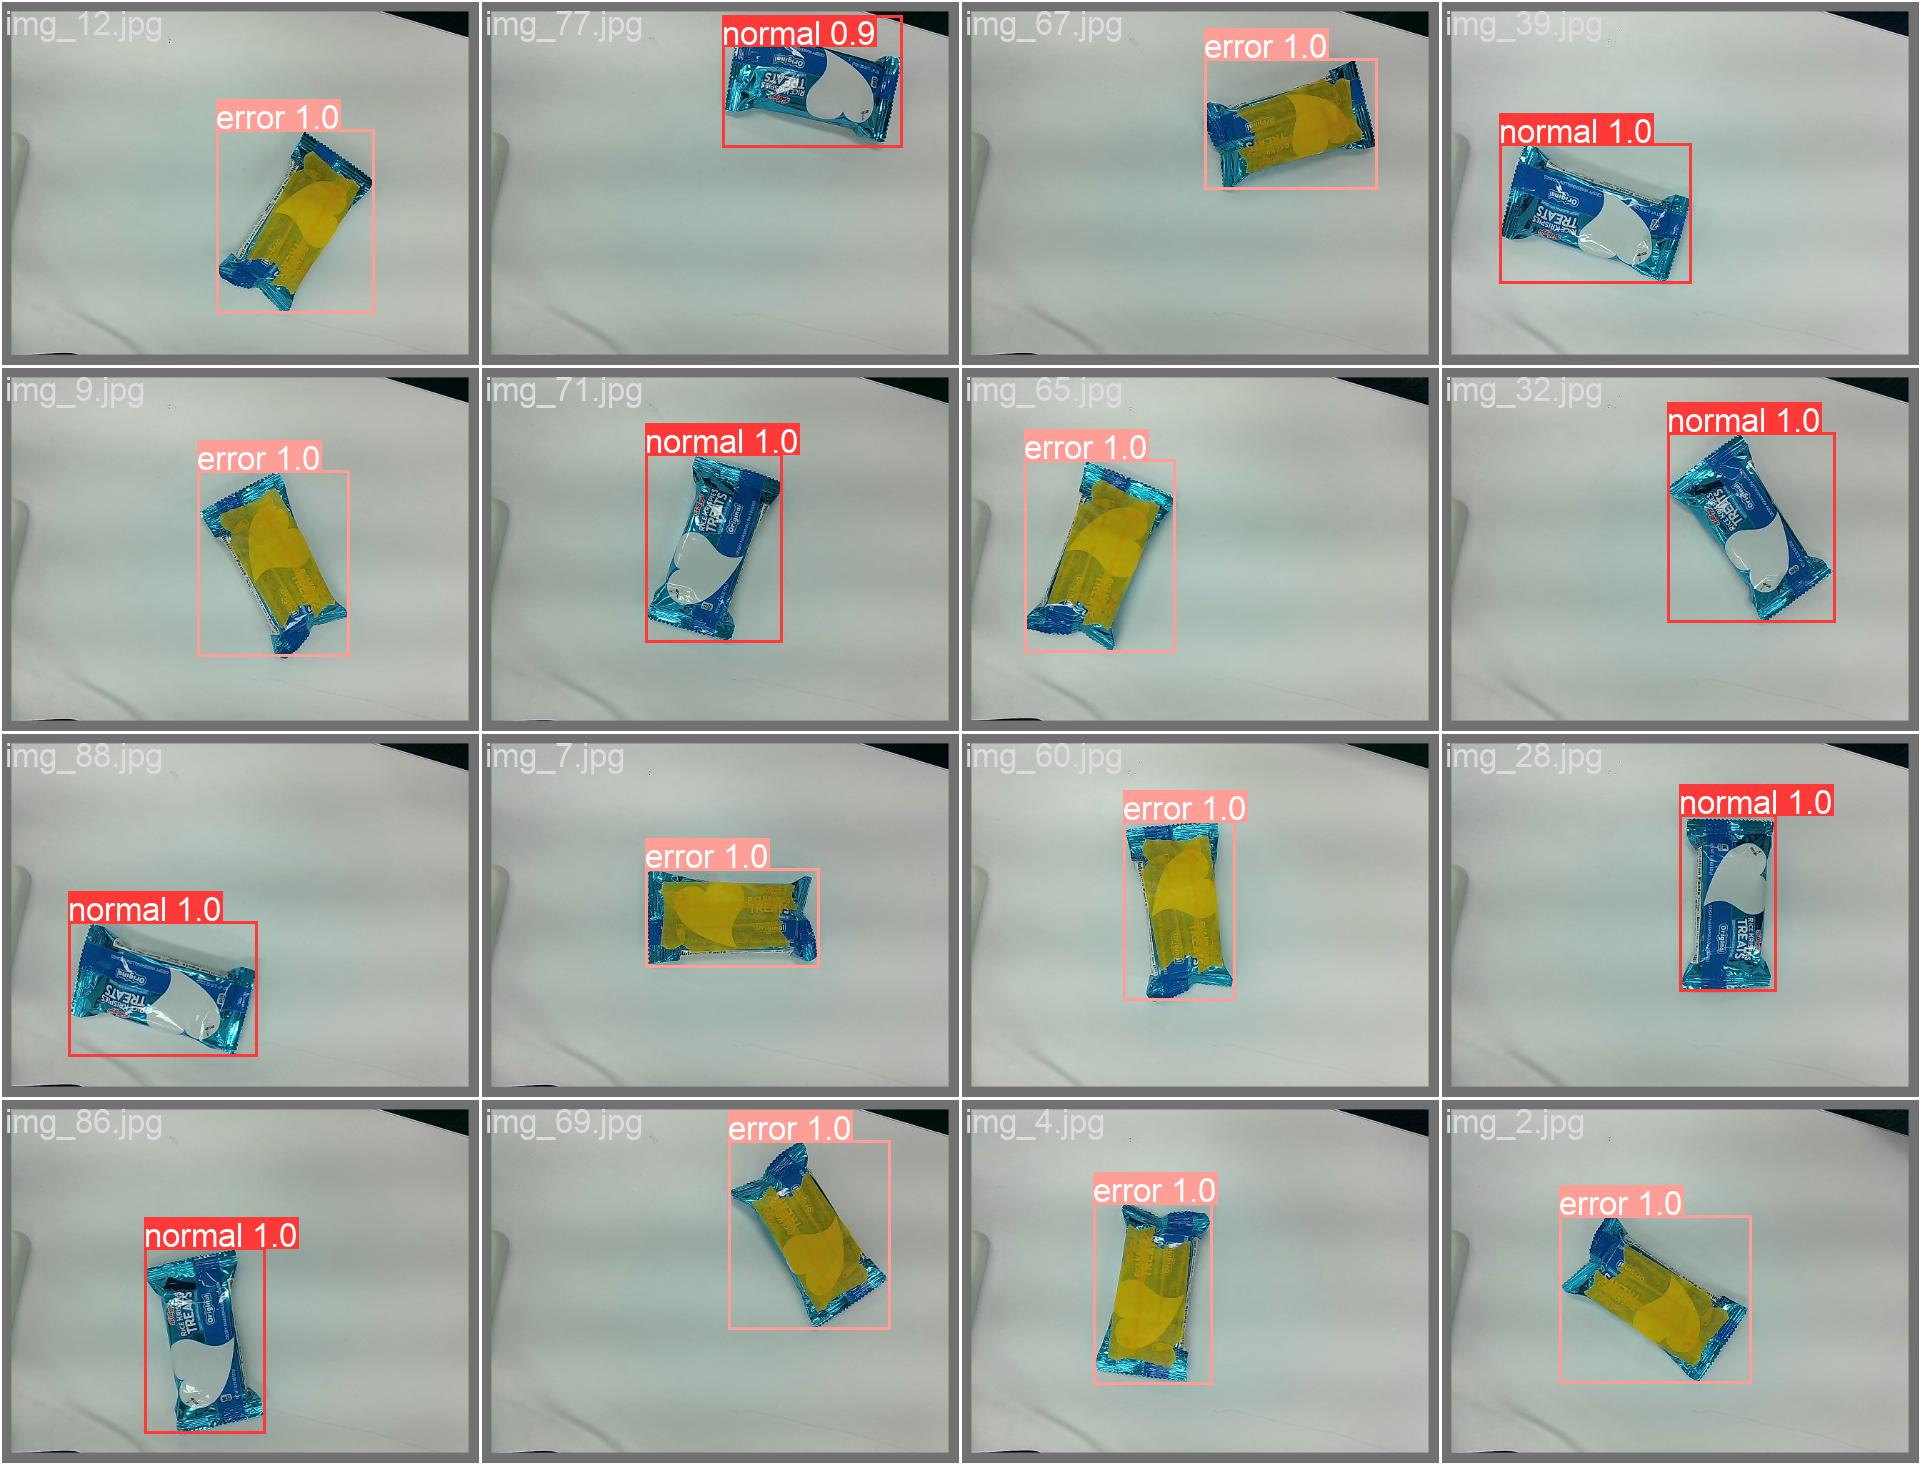

In [10]:
# Image(filename=f'/content/runs/detect/train2/val_batch0_pred.jpg', width=600)
Image(filename='C:/yolotest/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [10]:
print(type(model.names), len(model.names))

print(model.names)

<class 'dict'> 2
{0: 'normal', 1: 'error'}


```
train 과정중에 loss, accuracy 등의 graph 데이터는 runs/detect/train/ 에 있는 results.csv 와 results.png 통해서 확인가능하다
```

# 테스트 이미지 데이터 생성 및 확인

In [11]:
# 테스트 이미지

from glob import glob

test_image_list = glob('C:/yolotest/image_Data/test/images')

print(len(test_image_list))

test_image_list.sort()

for i in range(len(test_image_list)):

    print('i = ',i, test_image_list[i])

1
i =  0 C:/yolotest/image_Data/test/images


# 이미지내의 객체 검출 (Inference)

In [12]:
results = model.predict(source='C:/yolotest/image_Data/test/images', save=True)


image 1/20 C:\yolotest\image_Data\test\images\img_0.jpg: 480x640 1 error, 212.6ms
image 2/20 C:\yolotest\image_Data\test\images\img_10.jpg: 480x640 1 error, 7.0ms
image 3/20 C:\yolotest\image_Data\test\images\img_14.jpg: 480x640 1 error, 9.5ms
image 4/20 C:\yolotest\image_Data\test\images\img_16.jpg: 480x640 1 error, 8.0ms
image 5/20 C:\yolotest\image_Data\test\images\img_20.jpg: 480x640 1 error, 7.0ms
image 6/20 C:\yolotest\image_Data\test\images\img_25.jpg: 480x640 1 normal, 9.0ms
image 7/20 C:\yolotest\image_Data\test\images\img_26.jpg: 480x640 1 normal, 8.1ms
image 8/20 C:\yolotest\image_Data\test\images\img_27.jpg: 480x640 1 normal, 11.0ms
image 9/20 C:\yolotest\image_Data\test\images\img_37.jpg: 480x640 1 normal, 8.5ms
image 10/20 C:\yolotest\image_Data\test\images\img_40.jpg: 480x640 1 normal, 10.5ms
image 11/20 C:\yolotest\image_Data\test\images\img_46.jpg: 480x640 1 error, 10.5ms
image 12/20 C:\yolotest\image_Data\test\images\img_47.jpg: 480x640 1 error, 8.0ms
image 13/20 C:\

In [13]:
print(type(results), len(results))

<class 'list'> 20


In [14]:
import numpy as np

for result in results:

    uniq, cnt = np.unique(result.boxes.cls.cpu().numpy(), return_counts=True)  # Torch.Tensor -> numpy
    uniq_cnt_dict = dict(zip(uniq, cnt))

    print('\n{class num:counts} =', uniq_cnt_dict,'\n')

    for c in result.boxes.cls:
        print('class num =', int(c), ', class_name =', model.names[int(c)])


{class num:counts} = {1.0: 1} 

class num = 1 , class_name = error

{class num:counts} = {1.0: 1} 

class num = 1 , class_name = error

{class num:counts} = {1.0: 1} 

class num = 1 , class_name = error

{class num:counts} = {1.0: 1} 

class num = 1 , class_name = error

{class num:counts} = {1.0: 1} 

class num = 1 , class_name = error

{class num:counts} = {0.0: 1} 

class num = 0 , class_name = normal

{class num:counts} = {0.0: 1} 

class num = 0 , class_name = normal

{class num:counts} = {0.0: 1} 

class num = 0 , class_name = normal

{class num:counts} = {0.0: 1} 

class num = 0 , class_name = normal

{class num:counts} = {0.0: 1} 

class num = 0 , class_name = normal

{class num:counts} = {1.0: 1} 

class num = 1 , class_name = error

{class num:counts} = {1.0: 1} 

class num = 1 , class_name = error

{class num:counts} = {1.0: 1} 

class num = 1 , class_name = error

{class num:counts} = {1.0: 1} 

class num = 1 , class_name = error

{class num:counts} = {1.0: 1} 

class num 

# 결과 확인 및 다운로드

In [15]:
import glob

detetced_image_list = glob.glob(('C:/yolotest/runs/detect/train3'))
detected_image_nums = len(detetced_image_list)


print(detected_image_nums)
print(detetced_image_list)

1
['C:/yolotest/runs/detect/train3']


In [50]:
# 다운로드를 위한 inference image 압축

import zipfile
import os

TGT_DIR = os.path.join(GOOGLE_ROOT_DIR,'data') # 객체 인식한 결과 이미지 저장할 폴더
if not os.path.exists(TGT_DIR):
    os.mkdir(TGT_DIR)
    print('detected_result dir is created !!!')


with zipfile.ZipFile(os.path.join(TGT_DIR,'detected_images.zip'), 'w') as detected_images:

    for idx in range(detected_image_nums):
        detected_images.write(detetced_image_list[idx])

In [66]:
#베스트 모델 구글 드라이브에 저장하기
#또는 직접 다운로드

%cp C:/windows_v1.8.1/img/runs/detect/train/weights/best.pt /content/gdrive/MyDrive/Kairos/YOLOv8/3.Object_Detect_Car/model

## 커스텀 모델 사용


image 1/1 C:\yolotest\image_Data\test\images\img_14.jpg: 480x640 1 error, 41.0ms
Speed: 4.0ms preprocess, 41.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


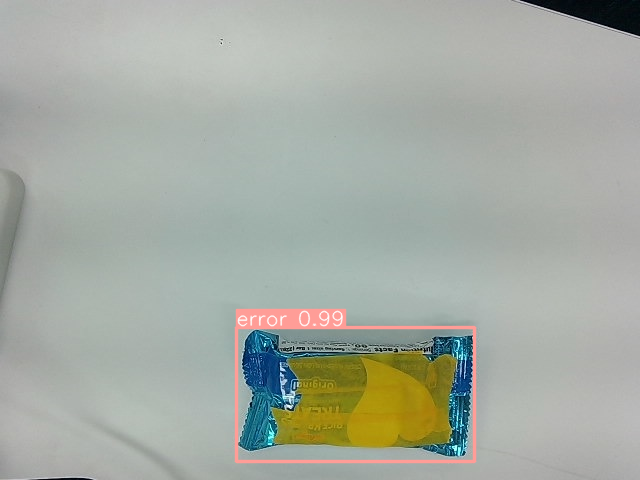

In [16]:
from ultralytics import YOLO
from PIL import Image

best_model = YOLO('C:/yolotest/runs/detect/train3/weights/best.pt')  # 모델
img = 'C:/yolotest/image_Data/test/images/img_14.jpg' #테스트 이미지

# result = best_model.predict(img,save=True)
results = best_model.predict(img,save=False)
# results = best_model.predict(img,save=False,conf=0.5)

for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    display(im)
    # im.show()  # show image
    # im.save('results.jpg')  # save image
